## MiniVGGNet CNN (TensorFlow + Keras)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import time

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### CIFAR 10 Dataset

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalize images (scale between 0 and 1)
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

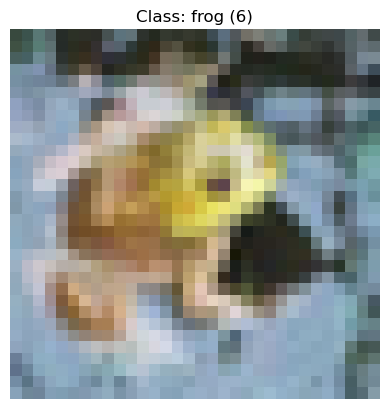

In [17]:
# test print to make sure import was  a success 
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

idx = np.random.randint(0, len(x_train))
sample_image = x_train[idx] 
sample_label = np.argmax(y_train[idx]) 
class_name = cifar10_classes[sample_label] 
sample_image = sample_image * 255.0 
sample_image = sample_image.astype("uint8")

plt.imshow(sample_image)
plt.title(f"Class: {class_name} ({sample_label})")
plt.axis("off")
plt.show()

In [18]:
# data augmentation for training only
train_datagen = ImageDataGenerator(
    rotation_range=10,   # Rotate images randomly
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Apply augmentation only on training data
train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

### MiniVGGNet Model

First conv block
- 2 conv layers (3x3, 32 filters)
- ReLu activation (discards noise)
- BatchNorm (normalizes activation for efficiency)
- Max Pool (downsamples dimensions)
- Dropout 25% (reduces overfitting)

Second block
- 2 conv layers (3x3, 64 filters)
- BatchNorm
- MaxPool
- Dropout 25%

Final
- flatten (1D vector)
- FC (512 neurons, 64 feature maps * 8x8 spacial dimensions)
- Batch norm (for FC)
- Droupout 50%
- Final FC (with number of classes)

In [19]:
def MiniVGGNet():
    model = Sequential([
        # First Conv Block
        Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # second conv block
        Conv2D(64, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # FC Layers
        Flatten(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),

        # output Layer (10 classes for CIFAR-10)
        Dense(10, activation="softmax")
    ])

    return model

model = MiniVGGNet()

In [20]:
# compile
opt = SGD(learning_rate=0.01, momentum=0.9, decay=0.01 / 40)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# prints summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        